# Exercise 1 - introducing correlations 

Let's look at the relationship between FERTILITY and LIFE EXPECTANCY. For this we'll use the gapminder dataset

In [1]:
install.packages("dplyr")
install.packages("ggplot2")
install.packages("dslabs")

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [2]:
library(dplyr)
library(ggplot2)
library(dslabs)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [5]:
data(gapminder)

In [6]:
head(gapminder)

,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,Albania,1960,115.40,62.87,6.19,1636054,NA,Europe,Southern Europe
2,Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa
3,Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa
4,Antigua and Barbuda,1960,NA,62.97,4.43,54681,NA,Americas,Caribbean
5,Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America
6,Armenia,1960,NA,66.86,4.55,1867396,NA,Asia,Western Asia


In [7]:
str(gapminder)

'data.frame':	10545 obs. of  9 variables:
 $ country         : Factor w/ 185 levels "Albania","Algeria",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ year            : int  1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 ...
 $ infant_mortality: num  115.4 148.2 208 NA 59.9 ...
 $ life_expectancy : num  62.9 47.5 36 63 65.4 ...
 $ fertility       : num  6.19 7.65 7.32 4.43 3.11 4.55 4.82 3.45 2.7 5.57 ...
 $ population      : num  1636054 11124892 5270844 54681 20619075 ...
 $ gdp             : num  NA 1.38e+10 NA NA 1.08e+11 ...
 $ continent       : Factor w/ 5 levels "Africa","Americas",..: 4 1 1 2 2 3 2 5 4 3 ...
 $ region          : Factor w/ 22 levels "Australia and New Zealand",..: 19 11 10 2 15 21 2 1 22 21 ...


Let's restrict our question a bit, and start by looking just at the year 2000

In [9]:
dat2000 = gapminder %>%
filter(year ==2000)
str(dat2000)

'data.frame':	185 obs. of  9 variables:
 $ country         : Factor w/ 185 levels "Albania","Algeria",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ year            : int  2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 ...
 $ infant_mortality: num  23.2 33.9 128.3 13.8 18 ...
 $ life_expectancy : num  74.7 73.3 52.3 73.8 74.2 ...
 $ fertility       : num  2.38 2.51 6.84 2.32 2.48 1.3 1.87 1.76 1.37 2.05 ...
 $ population      : num  3121965 31183658 15058638 77648 37057453 ...
 $ gdp             : num  3.69e+09 5.48e+10 9.13e+09 8.03e+08 2.84e+11 ...
 $ continent       : Factor w/ 5 levels "Africa","Americas",..: 4 1 1 2 2 3 2 5 4 3 ...
 $ region          : Factor w/ 22 levels "Australia and New Zealand",..: 19 11 10 2 15 21 2 1 22 21 ...


Let's start by just looking at the correlation. The best way to start is to visualise the relationship

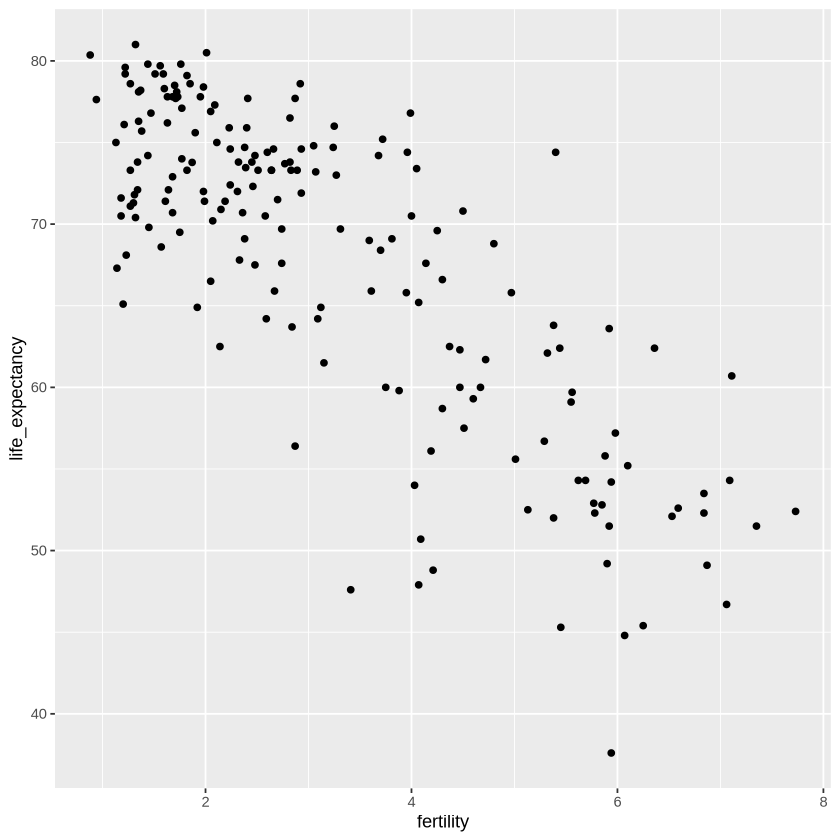

In [11]:
ggplot(dat2000,
     aes(x = fertility,
        y=life_expectancy)) + 
geom_point()

In [12]:
cor.test(dat2000$life_expectancy, dat2000$fertility)


	Pearson's product-moment correlation

data:  dat2000$life_expectancy and dat2000$fertility
t = -18.118, df = 183, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8475820 -0.7429083
sample estimates:
       cor 
-0.8012954 


Let's look at another question. What about the relationship between population and life expectancy?

Let's start by just looking at the correlation. The best way to start is to visualise the relationship

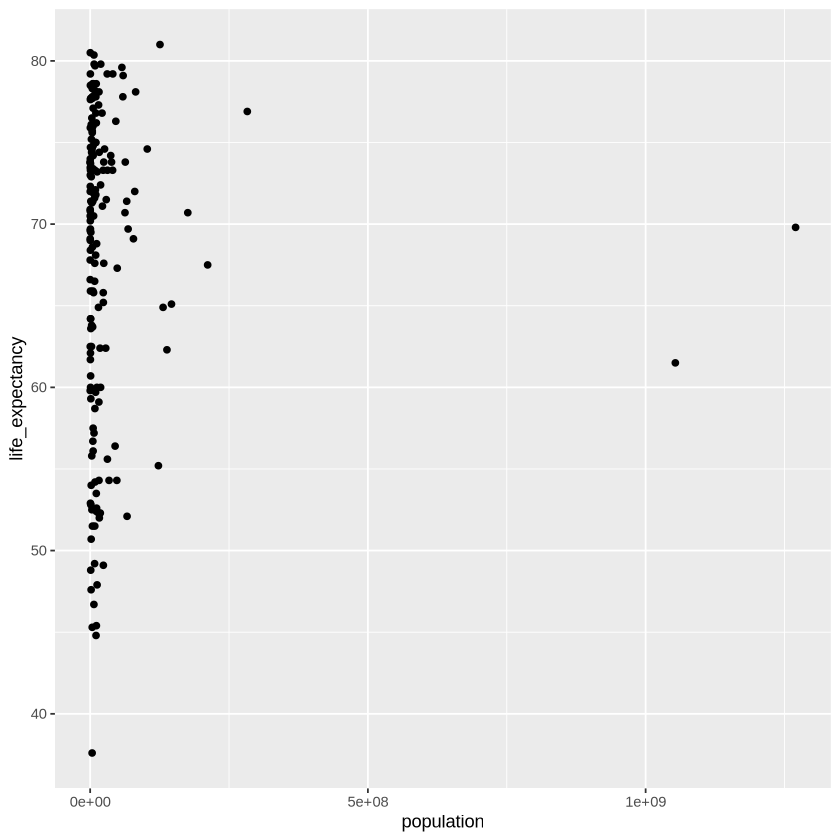

In [13]:
ggplot(dat2000,
      aes(x=population, 
         y=life_expectancy))+ 
geom_point()

This plot is hard to read due to the two very high data points, let's censor them

Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


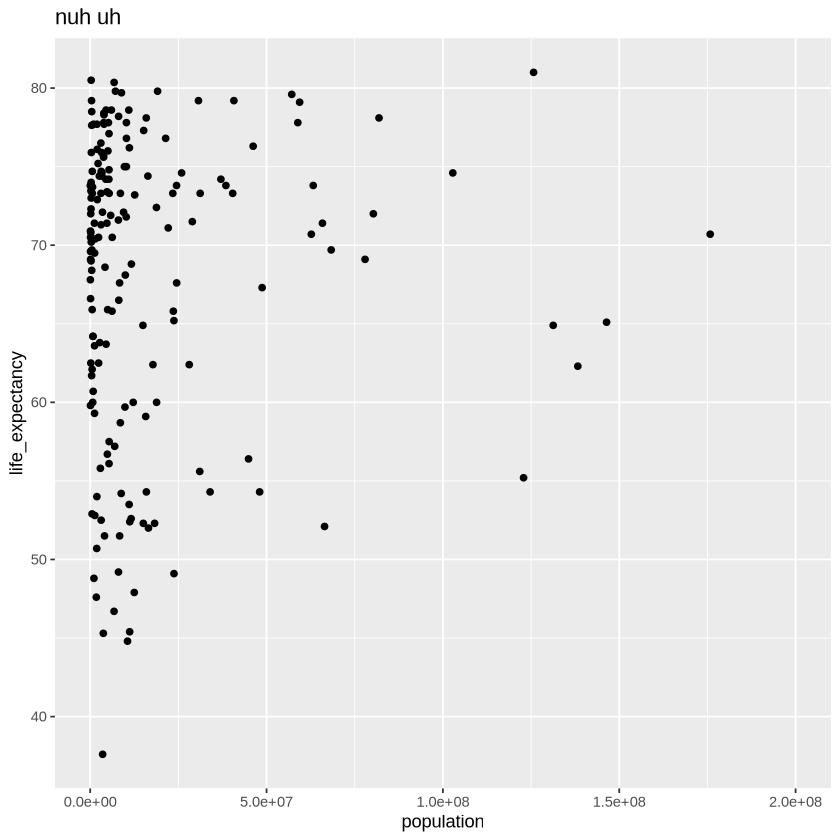

In [16]:
ggplot(dat2000,
      aes(x = population, 
         y = life_expectancy)) +
geom_point() +
xlim(0, 2e8) + 
ggtitle("nuh uh")

In [17]:
cor.test(dat2000$life_expectancy, dat2000$population)


	Pearson's product-moment correlation

data:  dat2000$life_expectancy and dat2000$population
t = 0.0056327, df = 183, p-value = 0.9955
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1438609  0.1446763
sample estimates:
         cor 
0.0004163806 


Let's apply linear models to both of these relationships

In [21]:
fertility_model = lm(life_expectancy ~ fertility, dat2000)
summary(fertility_model)


Call:
lm(formula = life_expectancy ~ fertility, data = dat2000)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.411  -3.623   1.071   3.836  16.247 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  82.1892     0.9002   91.30   <2e-16 ***
fertility    -4.4512     0.2457  -18.12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.751 on 183 degrees of freedom
Multiple R-squared:  0.6421,	Adjusted R-squared:  0.6401 
F-statistic: 328.3 on 1 and 183 DF,  p-value: < 2.2e-16


In [22]:
population_model = lm(life_expectancy ~ population, dat2000)
summary(population_model)


Call:
lm(formula = life_expectancy ~ population, data = dat2000)

Residuals:
   Min     1Q Median     3Q    Max 
-30.19  -6.09   3.01   6.91  13.21 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.779e+01  7.303e-01  92.826   <2e-16 ***
population  3.197e-11  5.677e-09   0.006    0.996    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.613 on 183 degrees of freedom
Multiple R-squared:  1.734e-07,	Adjusted R-squared:  -0.005464 
F-statistic: 3.173e-05 on 1 and 183 DF,  p-value: 0.9955


# Exercise 2 - interpreting linear models  

Let's go back to last week. We had a question about the influence of number of cylinders on fuel economy. Let's load the data and return to that question

In [23]:
install.packages("fueleconomy")

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [24]:
library(fueleconomy)

In [26]:
data(vehicles)
str(vehicles)

tibble [33,442 × 12] (S3: tbl_df/tbl/data.frame)
 $ id   : num [1:33442] 13309 13310 13311 14038 14039 ...
 $ make : chr [1:33442] "Acura" "Acura" "Acura" "Acura" ...
 $ model: chr [1:33442] "2.2CL/3.0CL" "2.2CL/3.0CL" "2.2CL/3.0CL" "2.3CL/3.0CL" ...
 $ year : num [1:33442] 1997 1997 1997 1998 1998 ...
 $ class: chr [1:33442] "Subcompact Cars" "Subcompact Cars" "Subcompact Cars" "Subcompact Cars" ...
 $ trans: chr [1:33442] "Automatic 4-spd" "Manual 5-spd" "Automatic 4-spd" "Automatic 4-spd" ...
 $ drive: chr [1:33442] "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" ...
 $ cyl  : num [1:33442] 4 4 6 4 4 6 4 4 6 5 ...
 $ displ: num [1:33442] 2.2 2.2 3 2.3 2.3 3 2.3 2.3 3 2.5 ...
 $ fuel : chr [1:33442] "Regular" "Regular" "Regular" "Regular" ...
 $ hwy  : num [1:33442] 26 28 26 27 29 26 27 29 26 23 ...
 $ cty  : num [1:33442] 20 22 18 19 21 17 20 21 17 18 ...


Let's isolate the relevant data again for Audi and VW midsizes

In [29]:
Audi_VW = vehicles %>%
filter(make == "Audi" & class == "Midsize Cars" | make == "Volkswagen" & class == "Midsize Cars")
str(Audi_VW)

tibble [254 × 12] (S3: tbl_df/tbl/data.frame)
 $ id   : num [1:254] 5656 5657 6784 6785 7908 ...
 $ make : chr [1:254] "Audi" "Audi" "Audi" "Audi" ...
 $ model: chr [1:254] "100" "100" "100" "100" ...
 $ year : num [1:254] 1989 1989 1990 1990 1991 ...
 $ class: chr [1:254] "Midsize Cars" "Midsize Cars" "Midsize Cars" "Midsize Cars" ...
 $ trans: chr [1:254] "Automatic 3-spd" "Manual 5-spd" "Automatic 3-spd" "Automatic 4-spd" ...
 $ drive: chr [1:254] "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" ...
 $ cyl  : num [1:254] 5 5 5 5 5 6 6 6 6 6 ...
 $ displ: num [1:254] 2.3 2.3 2.3 2.3 2.3 2.8 2.8 2.8 2.8 2.8 ...
 $ fuel : chr [1:254] "Regular" "Regular" "Regular" "Regular" ...
 $ hwy  : num [1:254] 20 23 20 22 22 23 22 24 22 24 ...
 $ cty  : num [1:254] 17 16 16 16 16 15 17 17 17 17 ...


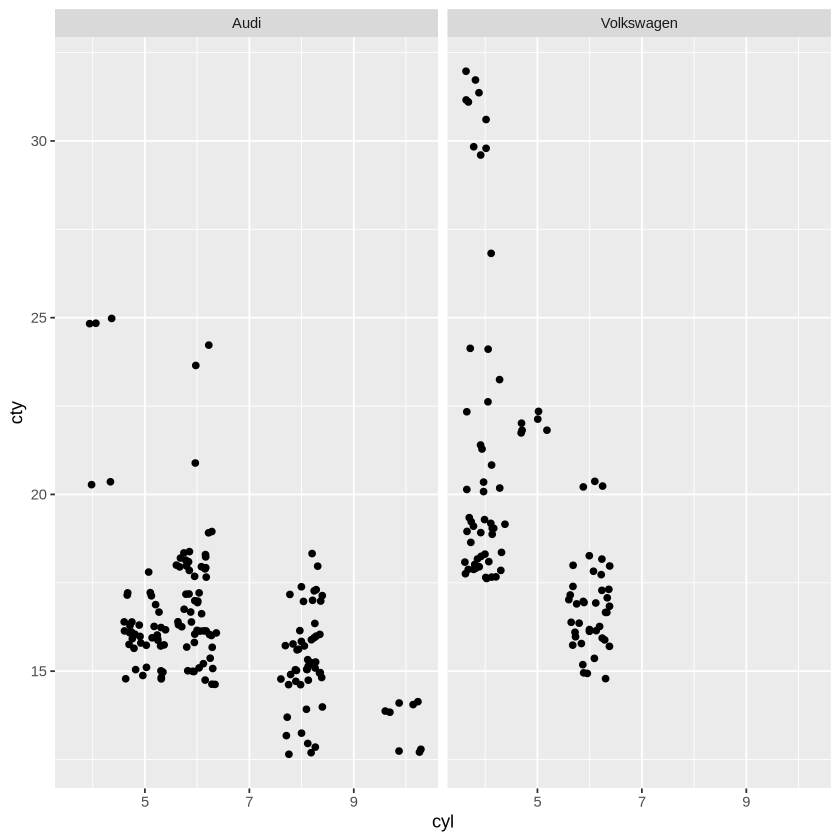

In [31]:
ggplot(Audi_VW, 
      aes(x = cyl,
         y = cty)) +
geom_point(position = "jitter") +
facet_wrap( ~make)

Let's use linear models to investigate the effect of number of cylinders on fuel economy in both makes

In [32]:
summary(lm(cty ~ cyl, data = subset(Audi_VW, make == "Volkswagen")))


Call:
lm(formula = cty ~ cyl, data = subset(Audi_VW, make == "Volkswagen"))

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6857 -2.6857 -0.9993  1.0007 10.3143 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  31.0586     1.9056  16.298  < 2e-16 ***
cyl          -2.3432     0.3826  -6.124 2.05e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.625 on 95 degrees of freedom
Multiple R-squared:  0.283,	Adjusted R-squared:  0.2755 
F-statistic:  37.5 on 1 and 95 DF,  p-value: 2.048e-08


In [33]:
summary(lm(cty ~ cyl, data = subset(Audi_VW, make == "Audi")))


Call:
lm(formula = cty ~ cyl, data = subset(Audi_VW, make == "Audi"))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3136 -1.3136 -0.2938  0.7062  7.3596 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  20.6801     0.6687  30.927  < 2e-16 ***
cyl          -0.6733     0.1001  -6.727 3.16e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.849 on 155 degrees of freedom
Multiple R-squared:  0.226,	Adjusted R-squared:  0.221 
F-statistic: 45.25 on 1 and 155 DF,  p-value: 3.156e-10


Let's look at this INTERACTION between variables WITHIN THE MODEL

In [34]:
summary(lm(cty ~ cyl * make, Audi_VW))


Call:
lm(formula = cty ~ cyl * make, data = Audi_VW)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6857 -1.3136 -0.3136  1.0007 10.3143 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         20.6801     0.9645  21.440  < 2e-16 ***
cyl                 -0.6733     0.1444  -4.663 5.07e-06 ***
makeVolkswagen      10.3785     1.7018   6.099 4.04e-09 ***
cyl:makeVolkswagen  -1.6699     0.3164  -5.278 2.83e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.667 on 250 degrees of freedom
Multiple R-squared:  0.4235,	Adjusted R-squared:  0.4166 
F-statistic: 61.23 on 3 and 250 DF,  p-value: < 2.2e-16


Let's go back to this question about which model is better. We can do this using model comparison. Let's build a model without make, and one with, and see what we learn

In [35]:
m1 = lm(cty ~ cyl, Audi_VW)
m2 = lm(cty ~ cyl + make, Audi_VW)
m3 = lm(cty ~ cyl * make, Audi_VW)

anova(m1, m2, m3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,252,2095.761,NA,NA,NA,NA
2,251,1976.324,1,119.4377,16.79231,5.639271e-05
3,250,1778.161,1,198.1631,27.86068,2.829931e-07


# Exercise 3 - non-linear predictors

Lets look at the relationship infant mortality and life expectancy in the year 2000 what do you notice?

Warning message:
“Removed 7 rows containing missing values or values outside the scale range
(`geom_point()`).”


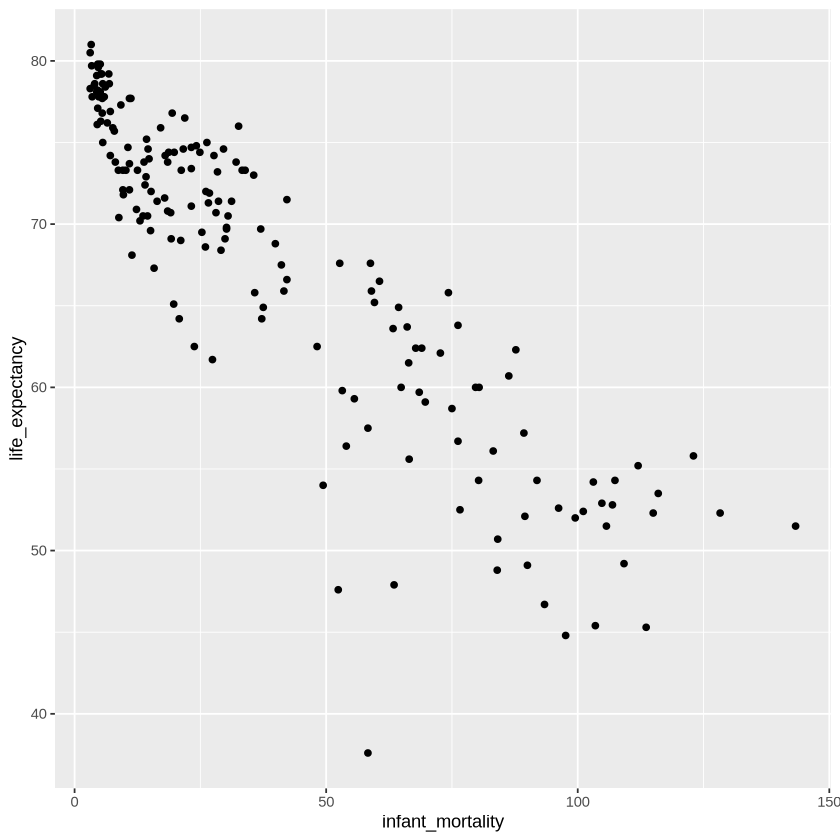

In [36]:
ggplot(dat2000,
      aes(x = infant_mortality,
         y = life_expectancy)) + 
geom_point()

In [37]:
dat2000$infant_mortality2 = dat2000$infant_mortality^2

In [39]:
str(dat2000)

'data.frame':	185 obs. of  10 variables:
 $ country          : Factor w/ 185 levels "Albania","Algeria",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ year             : int  2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 ...
 $ infant_mortality : num  23.2 33.9 128.3 13.8 18 ...
 $ life_expectancy  : num  74.7 73.3 52.3 73.8 74.2 ...
 $ fertility        : num  2.38 2.51 6.84 2.32 2.48 1.3 1.87 1.76 1.37 2.05 ...
 $ population       : num  3121965 31183658 15058638 77648 37057453 ...
 $ gdp              : num  3.69e+09 5.48e+10 9.13e+09 8.03e+08 2.84e+11 ...
 $ continent        : Factor w/ 5 levels "Africa","Americas",..: 4 1 1 2 2 3 2 5 4 3 ...
 $ region           : Factor w/ 22 levels "Australia and New Zealand",..: 19 11 10 2 15 21 2 1 22 21 ...
 $ infant_mortality2: num  538 1149 16461 190 324 ...


In [40]:
m1 = lm(life_expectancy ~ infant_mortality, dat2000)
m2 = lm(life_expectancy ~ infant_mortality + infant_mortality2, dat2000)
anova(m1, m2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,176,3444.197,NA,NA,NA,NA
2,175,3143.619,1,300.5784,16.7327,6.555187e-05
